**Importation important libraries**

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key

ModuleNotFoundError: No module named 'config'

**API Call**

In [60]:
url = "https://api-football-v1.p.rapidapi.com/v3/teams/statistics"
querystring = {"league":"61","season":"2022","team":"81"}
headers = {
    "X-RapidAPI-Key": api_key,
    "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

In [61]:
# Convert response in dictionnary
data = response.json()


# Convert dictionnary in JSON format
json_data = json.dumps(data)

# Create a file and write JSON in it - for data exploration purposes
with open("data.json", "w") as outfile:
    outfile.write(json_data)


**First Analysys**


Analysis OM wins|draw|loses in Ligue 1


Text(0.5, 1.0, 'Repartition OM matches in Ligue 1')

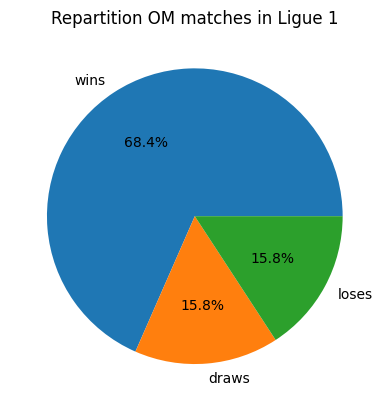

In [62]:
#fetch data

wins = data['response']['fixtures']['wins']['total']
draws = data['response']['fixtures']['draws']['total']
loses = data['response']['fixtures']['loses']['total']

results = [wins, draws, loses]
labels= ['wins', 'draws', 'loses']

#Creation of the histogram
plt.pie(results, labels=labels, autopct='%1.1f%%')
plt.title("Repartition OM matches in Ligue 1")

Analysis of OM wins in Ligue 1

In [48]:
#Compute percentage victory at home
num_home_wins = data['response']['fixtures']['wins']['home']
num_home_matches = data['response']['fixtures']['played']['home']

percentage_wins_home = num_home_wins/num_home_matches

print("Win percentage for home matches : " + str(percentage_wins_home))

#Compute percentage victory away
num_away_wins = data['response']['fixtures']['wins']['away']
num_away_matches = data['response']['fixtures']['played']['away']

percentage_wins_away = num_away_wins / num_away_matches

print("Win percentage for away matches : " + str(percentage_wins_away))

#Ratio between the 2
ratio = percentage_wins_home/percentage_wins_away
print("")
print(f"Marseille win {ratio} more matches at home than away this season in Ligue 1")

Win percentage for home matches : 0.7
Win percentage for away matches : 0.6666666666666666

Marseille win 1.05 more matches at home than away this season


Text(0.5, 1.0, 'Repartition OM wins')

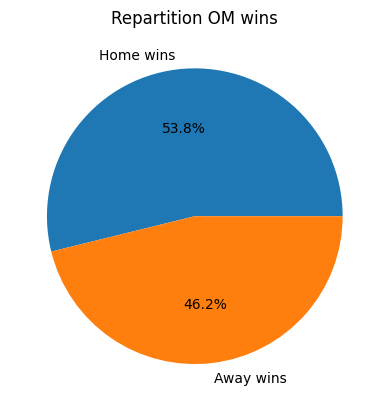

In [39]:
#Creation of a histogram to see win at home vs win away on all the wins of OM

labels = ["Home wins", "Away wins"]
values = [num_home_wins, num_away_wins]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Repartition OM wins")

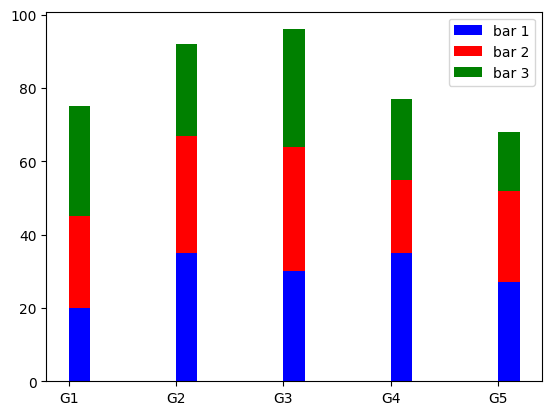

In [32]:
#A tester

# Donnees à afficher
bar1_data = [20, 35, 30, 35, 27]
bar2_data = [25, 32, 34, 20, 25]
bar3_data = [30, 25, 32, 22, 16]
bar_labels = ['G1', 'G2', 'G3', 'G4', 'G5']

# Pour la largeur des barres
bar_width = 0.2

# Pour les positions des barres
bar_x_positions = [i for i in range(len(bar_labels))]

# Création des barres
plt.bar(bar_x_positions, bar1_data, bar_width, align='edge', color='blue', label='bar 1')
plt.bar(bar_x_positions, bar2_data, bar_width, align='edge', color='red', label='bar 2', bottom=bar1_data)
plt.bar(bar_x_positions, bar3_data, bar_width, align='edge', color='green', label='bar 3', bottom=[i+j for i,j in zip(bar1_data, bar2_data)])

# Ajout des étiquettes pour l'axe x
plt.xticks(bar_x_positions, bar_labels)

# Ajout de la legende
plt.legend()

# Affichage du graphique
plt.show()
